In [1]:
from qiskit import * # importing all functions from qiskit

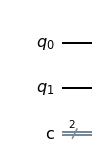

In [2]:
circuit = QuantumCircuit(2,2)# build a quantum circuit with 2 qubits and 2 classical bits 
%matplotlib inline 
circuit.draw(output='mpl') # for a better visualisation matplotlib is used

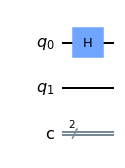

In [3]:
circuit.h(0)# appyling hadmard gate
circuit.draw(output='mpl')

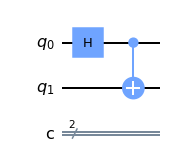

In [4]:
circuit.cx(0,1)# applying cnot gate : control = q0 target = q1
circuit.draw(output='mpl')

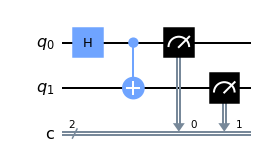

In [5]:
circuit.measure([0,1],[0,1])# measure qubit 0 and 1 and associate it with classical bits
circuit.draw(output='mpl')

In [6]:
# Executing it on a quantum simulator 
simu = Aer.get_backend('qasm_simulator')

In [7]:
# a function in qiskit to execute the circuit

result = execute(circuit, backend = simu).result()

In [8]:
from qiskit.tools.visualization import plot_histogram

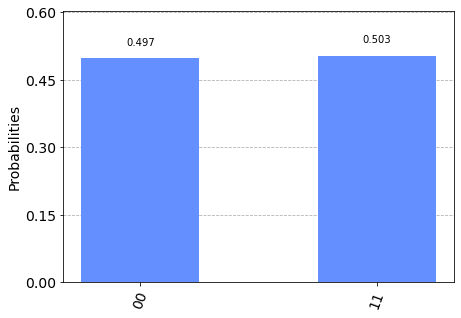

In [9]:
plot_histogram(result.get_counts(circuit))

In [10]:
# running the circuit on a real Quantum Computer using IBM
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider('ibm-q')

provider.backends() #available simulators

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [12]:
quantumc = provider.get_backend('ibmq_santiago')# real quantum computers

In [13]:
import qiskit.tools.jupyter
%qiskit_job_watcher 


job = execute(circuit,backend=quantumc)


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [14]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


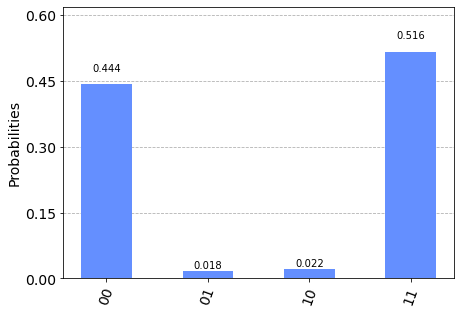

In [15]:
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

In [16]:
%qiskit_disable_job_watcher